1. Please design and implement a solution to crawl the publication title, year and author list of
every unique publication record on the target website. Then, please create and display a table
that contains these unique records. The table should consist of five columns: the row number in
the table, publication title, year, author list, and the number of authors (hint: you will need to
develop an algorithm to work this out). The records should be sorted first according to
descending year values, then by descending number of author values, and finally by the titles
from A to Z. Include the full final result in your Jupyter Notebook.   

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

In [2]:
headers = {'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36'}
url = "https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_type_animationandgraphics.htm"
urls = []
page = requests.get(url, verify=False)
soup = BeautifulSoup(page.content, "html.parser")

In [3]:
Topic_all = soup.select_one("#divBackground > p:nth-child(6)").text[9:]
Topics = Topic_all.split(" / ")

for Topic in Topics:
    Topic= Topic.replace(" ", "")
    Topic = Topic.lower()
    url_new = url[:url.rfind("_")+1] + Topic + ".htm"
    urls.append(url_new)

In [4]:
Titles = []
Years = []
Authors = []
Authors_num = []

for url in urls:

    page = requests.get(url, headers=headers, verify=False)
    soup = BeautifulSoup(page.content, "html.parser")
    publications = soup.select("#divBackground > div > div")
    
    for publication in publications:
        
        Title = publication.select_one("div.w3-container.w3-cell.w3-mobile.w3-cell-middle > span.PublicationTitle")
        if Title is not None:
            Title = Title.text
        else:
            pass
        
        Title_delete = publication.select_one('span[style*="orange"]')
        if Title_delete is not None:
            Title_delete = Title_delete.text
            if Title_delete:
                Title = Title.replace(Title_delete, "")
        
        Year = publication.select_one("div.w3-container.w3-cell.w3-mobile.w3-cell-middle > span:nth-child(3)")
        if Year is not None:
            Year = Year.text[-4:]
        
        Author = publication.select_one("div.w3-container.w3-cell.w3-mobile.w3-cell-middle > span:nth-child(5)")
        if Author is not None:
            Author = Author.text
            Author = Author.replace(" and ", ", ")
            Author_num = str(Author.count(",")+1)

        Titles.append(Title)
        Years.append(Year)
        Authors.append(Author)
        Authors_num.append(Author_num)

In [5]:
df = pd.DataFrame({"Titles":Titles, "Years":Years, "Authors":Authors, "Authors_num":Authors_num})
df.drop_duplicates('Titles', ignore_index=True, inplace=True)
df = df.astype({'Authors_num':'int32'})
df = df.sort_values('Years', ascending=False)
df = df.sort_values('Authors_num', ascending=False)
df = df.sort_values('Titles')
df = df.reset_index(drop=True)
df = df.dropna()
df.index.name = 'Index'
df.index = df.index+1
df

,Titles,Years,Authors,Authors_num
Index,,,,
1,360 Depth Estimation in the Wild - The Depth36...,2022,"Qi Feng, Hubert P. H. Shum, Shigeo Morishima",3
2,3D Car Shape Reconstruction from a Contour Ske...,2021,"Naoki Nozawa, Hubert P. H. Shum, Qi Feng, Edmo...",5
3,3D Car Shape Reconstruction from a Single Sket...,2019,"Naoki Nozawa, Hubert P. H. Shum, Edmond S. L. ...",4
4,3D Reconstruction of Sculptures from Single Im...,2022,"Ziyi Chang, George Alex Koulieris, Hubert P. H...",3
5,A Dual-Stream Recurrent Neural Network for Stu...,2018,"Shanfeng Hu, Hindol Bhattacharya, Matangini Ch...",5
...,...,...,...,...
156,Unifying Human Motion Synthesis and Style Tran...,2023,"Ziyi Chang, Edmund J. C. Findlay, Haozheng Zha...",4
157,Unifying Person and Vehicle Re-identification,2020,"Daniel Organisciak, Dimitrios Sakkos, Edmond S...",5
158,Unsupervised Abnormal Behaviour Detection with...,2017,"Shoujiang Xu, Edmond S. L. Ho, Nauman Aslam, H...",4


In order to obtain all URLs, I first obtained the string for all topics and then converted it into URL form. I used a for loop to obtain every title, year, author, and author number after collecting all the topic's URLs. The most challenging part was getting rid of small titles related to awards that are orange in color. By using the style function, I was able to locate it and substituted it with a blank using the if statement. In terms of Year, the year is located in the last 4 words, so I used an indexing function to find it in whole sentences. I got the author and the author number at the same time because I first got the author and then counted it using a comma. At last, I added every title, year, author, and author's number to the list. After obtaining all titles, years, authors, and author numbers, I converted them into a table called a dataframe in Python. I removed duplicates with the same title and arranged years, authors, and titles in order.   
I was able to see that there are 160 unique titles at a glance after getting the dataframe. After creating it on my own, I came to the realization that the table is much easier to read than the text. Also, I can access these features below using the dataframe.
- The oldest publication: A Spatiotemporal Approach to Extract the 3D Trajectory of the Baseball from a Single View Video Sequence
- The publication with the lowest author number: Simulating Interactions Among Multiple Characters, Serious Games with Human-Object Interactions using RGB-D Camera
- The publication with the highest author number: A Video-Based Augmented Reality System for Human-in-the-Loop Muscle Strength Assessment of Juvenile Dermatomyostis
man-Object Interactions using RGB-D Camera
- The publication with the highest author number: A Video-Based Augmented Reality System for Human-in-the-Loop Muscle Strength Assessment of Juvenile Dermatomyostis


2. For this question, you should record the year, number of citations, topic, and number of Links,
Downloads, and Online Resources (LDOR) for each journal paper listed on the scraping website
and store these in a dataframe. Take care to filter the elements for uniqueness before producing
the analysis. Produce a table showing the mean and variance of citations per journal publication
in each topic and print it legibly in your submission. In Figure 1, you should show the mean and
variance of citations per year across all journal publications for each topic. In Figure 2, you should
show the number of LDOR against the number of citations for each journal publication. Each
figure should be legible and have appropriate labels.

In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import urllib3
import re
import matplotlib.pyplot as plt
import seaborn as sns
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

In [7]:
url = "https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_type_animationandgraphics.htm"
urls = []
headers = {'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36'}
page = requests.get(url, verify=False)
soup = BeautifulSoup(page.content, "html.parser")

In [8]:
Topic_all = soup.select_one("#divBackground > p:nth-child(6)").text[9:]
Topics = Topic_all.split(" / ")

for Topic in Topics:
    Topic= Topic.replace(" ", "")
    Topic = Topic.lower()
    url_new = url[:url.rfind("_")+1] + Topic + ".htm"
    urls.append(url_new)

In [9]:
df2_Titles = []
df2_Topics = []

for url in urls:

    page = requests.get(url, headers=headers, verify=False)
    soup = BeautifulSoup(page.content, "html.parser")
    publications = soup.select("#divBackground > div:nth-child(8) > div")
    
    for publication in publications:
        
        df2_Title = publication.select_one("div.w3-container.w3-cell.w3-mobile.w3-cell-middle > span.PublicationTitle")
        if df2_Title is not None:
            df2_Title = df2_Title.text
        else:
            pass

        if df2_Title == "Less is More: Reducing Task and Model Complexity for 3D Point Cloud Semantic Segmentation":
            continue
        if df2_Title == "Enhancing Perception and Immersion in Pre-Captured Environments through Learning-Based Eye Height Adaptation":
            continue
        if df2_Title == "On the Design Fundamentals of Diffusion Models: A Survey":
            continue
        
        df2_Title_delete = publication.select_one('span[style*="orange"]')
        if df2_Title_delete is not None:
            df2_Title_delete = df2_Title_delete.text
            if df2_Title_delete:
                df2_Title = df2_Title.replace(df2_Title_delete, "")

        if url == "https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_type_animationandgraphics.htm":
            df2_Topic = "Animation and Graphics"
        elif url == "https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_type_movementevaluation.htm":
            df2_Topic = "Movement Evaluation"
        elif url == "https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_type_biomedicalengineering.htm":
            df2_Topic = "Biomedical Engineering"
        elif url == "https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_type_interactionmodelling.htm":
            df2_Topic = "Interaction Modelling"
        elif url == "https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_type_others.htm":
            df2_Topic = "Others"
        elif url == "https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_type_actionrecognition.htm":
            df2_Topic = "Action Recognition"
        elif url == "https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_type_depthand3destimation.htm":
            df2_Topic = "Depth and 3D Estimation"
        elif url == "https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_type_virtualreality.htm":
            df2_Topic = "Virtual Reality"
        elif url == "https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_type_facialfeatureanalysis.htm":
            df2_Topic = "Facial Feature"
        elif url == "https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_type_3dsurfaces.htm":
            df2_Topic = "3D surfaces"
        elif url == "https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_type_crowdsimulation.htm":
            df2_Topic = "Crowd Simulation"
        elif url == "https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_type_robotics.htm":
            df2_Topic = "Robotics"
        elif url == "https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_type_handmodelling.htm":
            df2_Topic = "Hand Modelling"
        elif url == "https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_type_computationalintelligence.htm":
            df2_Topic = "Computational Intelligence"
        elif url == "https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_type_biometrics.htm":
            df2_Topic = "Biometrics"
        elif url == "https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_type_environmentcapturing.htm":
            df2_Topic = "Environment Capturing"
        elif url == "https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_type_motionanalysis.htm":
            df2_Topic = "Motion Analysis"
        elif url == "https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_type_literaturereview.htm":
            df2_Topic = "Literature Review"
        
        df2_Topics.append(df2_Topic)
        df2_Titles.append(df2_Title)

In [10]:
df2 = pd.DataFrame({"Titles":df2_Titles, "Topics":df2_Topics})
df2 = df2.dropna()
df2 = df2.groupby('Titles')['Topics'].apply(list).reset_index(name='Topics')

In [11]:
webpage_links = []
webpage_links = list(webpage_links)
webpage_links = list(filter(None, webpage_links))

for url in urls:

    page = requests.get(url, headers=headers, verify=False)
    soup = BeautifulSoup(page.content, "html.parser")
    publications = soup.select("#divBackground > div:nth-child(8) > div")

    for publication in publications:
        webpage_link = publication.select_one("div.w3-container.w3-cell.w3-mobile.w3-cell-middle > span:nth-child(6) > a")
        if webpage_link is not None:
            webpage_link = "https://sitescrape.awh.durham.ac.uk/comp42315/" + webpage_link["href"]
        else:
            webpage_link = "https://sitescrape.awh.durham.ac.uk/comp42315/pbl_tvcg2023jdm.htm"

        
        if webpage_link == "https://sitescrape.awh.durham.ac.uk/comp42315/pbl_cvpr2023segmentation.htm":
            continue
        if webpage_link == "https://sitescrape.awh.durham.ac.uk/comp42315/pbl_ismar2023height.htm":
            continue        
        if webpage_link == "https://sitescrape.awh.durham.ac.uk/comp42315/pbl_arxiv2023diffusion.htm":
            continue
        
        webpage_links.append(webpage_link)

In [12]:
a_Titles = []
a_Years = []
a_Cite_nums = []
a_LDOR_nums = []

for webpage_link in webpage_links:

    page = requests.get(webpage_link, headers=headers, verify=False)
    soup = BeautifulSoup(page.content, "html.parser")
    a_publications = soup.select("#divBackground")
    
    for a_publication in a_publications:
        
        a_Title = a_publication.select_one("h1")
        if a_Title is not None:
            a_Title = a_Title.text
        else:
            pass
        
        a_Title_delete = a_publication.select_one('span[style*="orange"]')
        if a_Title_delete is not None:
            a_Title_delete = a_Title_delete.text
            if a_Title_delete:
                a_Title = a_Title.replace(a_Title_delete, "")
        
        a_Year = a_publication.select_one("div:nth-child(4) > h2")
        if a_Year is not None:
            a_Year = a_Year.text[-4:]

        a_Cite_num = a_publication.select_one('span[style*="orange"]')
        if a_Cite_num is not None:
            a_Cite_num = a_Cite_num.text
            a_Cite_num = a_Cite_num.strip()
            a_Cite_num = a_Cite_num.replace("Citation: ", "")
            a_Cite_num = a_Cite_num.replace("##", "")
        if len(a_Cite_num)==0:
                    a_Cite_num = "0"

        divLDOR = a_publication.select_one("div:nth-child(8)")
        if divLDOR is not None:
            a_LDOR_num = divLDOR.text
            a_LDOR_num = a_LDOR_num.replace("\n", " ")
            a_LDOR_num = a_LDOR_num.strip()
            # replace
            a_LDOR_num = a_LDOR_num.replace(" - Publisher's Page", "")
            a_LDOR_num = a_LDOR_num.replace(" IP Portal", "")
            a_LDOR_num = a_LDOR_num.replace(" Slides", "")
            a_LDOR_num = a_LDOR_num.replace(" Part 1", "")
            a_LDOR_num = a_LDOR_num.replace(" Part 2", "")
            a_LDOR_num = a_LDOR_num.replace(" Part 3", "")
            a_LDOR_num = a_LDOR_num.replace(" Material", "")
            a_LDOR_num = a_LDOR_num.replace(" Matter", "")
            a_LDOR_num = a_LDOR_num.replace(" Code", "")
            a_LDOR_num = a_LDOR_num.split()

            isYoutubes = divLDOR.find_all(class_="youtube-player")
            isYoutube_lists = []
            for isYoutube in isYoutubes:
                isYoutube_list = isYoutube.get("src")
                isYoutube_lists.append(isYoutube_list)

            a_LDOR_num = len(a_LDOR_num) + len(isYoutube_lists)
        
        a_Titles.append(a_Title)
        a_Years.append(a_Year)
        a_Cite_nums.append(a_Cite_num)
        a_LDOR_nums.append(a_LDOR_num)

In [13]:
df3 = pd.DataFrame({"Titles":a_Titles, "Years":a_Years, "Cite_nums":a_Cite_nums, "LDOR_nums":a_LDOR_nums})
df3.drop_duplicates('Titles', ignore_index=True, inplace=True)
df3['Cite_nums'] = df3['Cite_nums'].astype(int)
df3.index.name = 'Index'
df3.index = df3.index+1

In [14]:
df_merge = pd.merge(df3, df2, on='Titles', how='left')
df_merge.index.name = 'Index'
df_merge.index = df_merge.index+1

In [15]:
df_merge_topics = df_merge.explode('Topics').reset_index(drop=True)
fig1 = pd.DataFrame()
fig1["Mean"] = df_merge_topics.groupby('Topics')['Cite_nums'].mean()
fig1["Variance"] = df_merge_topics.groupby('Topics')['Cite_nums'].var()
fig1.reset_index(drop=False, inplace=True)
fig1.index = fig1.index+1
fig1

,Topics,Mean,Variance
1,3D surfaces,13.400000,74.800000
2,Action Recognition,35.000000,1289.000000
3,Animation and Graphics,25.666667,842.787879
4,Biomedical Engineering,33.900000,2448.100000
5,Biometrics,16.375000,313.982143
6,Computational Intelligence,18.000000,223.000000
7,Crowd Simulation,15.400000,139.300000
8,Depth and 3D Estimation,59.400000,4432.800000
9,Facial Feature,10.000000,74.500000
10,Hand Modelling,5.333333,2.333333


In [16]:
fig1_new = df_merge
fig1_new = fig1_new.Topics.apply(pd.Series).merge(fig1_new, right_index=True, left_index=True)
fig1_new.drop('Topics', axis=1, inplace=True)
fig1_new = pd.melt(fig1_new, id_vars=['Titles', 'Years', 'Cite_nums', 'LDOR_nums'], value_vars=[0, 1, 2, 3])
fig1_new = fig1_new.dropna(axis=0)
fig1_new.drop('variable', axis=1, inplace=True)
fig1_new.rename(columns={'value':'Topics'}, inplace=True)

In [17]:
fig1_final = pd.DataFrame()
fig1_final["Mean"] = fig1_new.groupby(['Years', 'Topics'])['Cite_nums'].mean()
fig1_final["Var"] = fig1_new.groupby(['Years', 'Topics'])['Cite_nums'].var()
fig1_final.reset_index(drop=False, inplace=True)
fig1_final.index = fig1_final.index+1

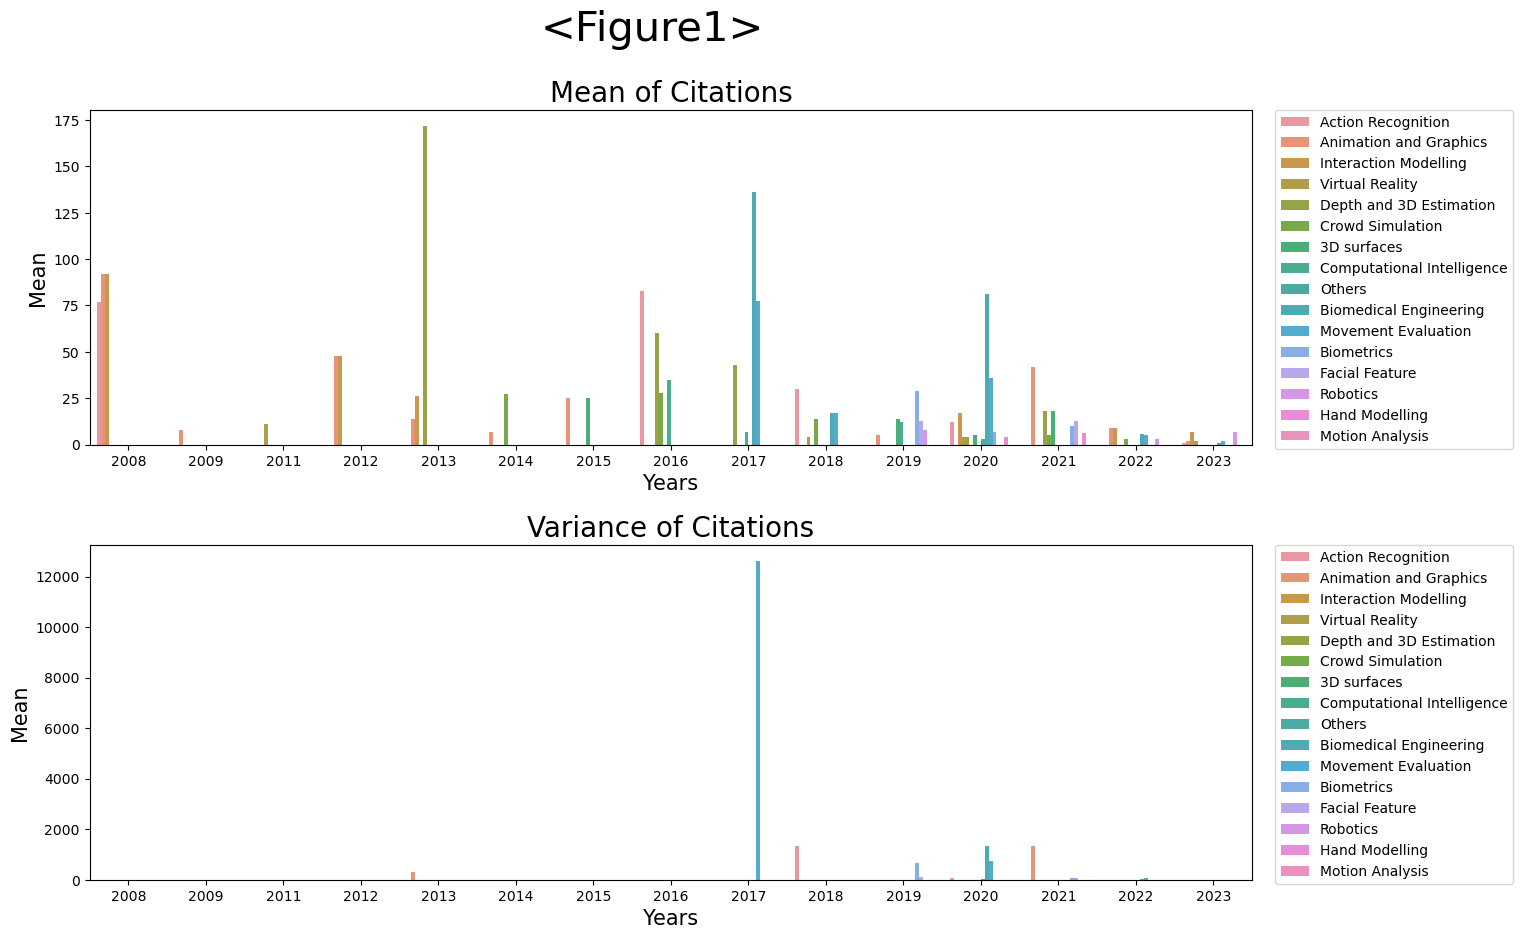

In [18]:
fig, ax = plt.subplots(2,1, figsize=(15, 10))
fig.suptitle('<Figure1>', fontsize=30)
plt.subplots_adjust(wspace=0.5, hspace=0.3)

ax1 = sns.barplot(x='Years', y='Mean', hue='Topics', data=fig1_final, ax=ax[0])
ax1.set_title('Mean of Citations', fontsize=20)
ax1.legend(bbox_to_anchor=(1.02,1), loc=2, borderaxespad=0)
ax1.set_xlabel('Years', fontsize=15)
ax1.set_ylabel('Mean', fontsize=15)

ax2 = sns.barplot(x='Years', y='Var', hue='Topics', data=fig1_final, ax=ax[1])
ax2.set_title('Variance of Citations', fontsize=20)
ax2.legend(bbox_to_anchor=(1.02,1), loc=2, borderaxespad=0)
ax2.set_xlabel('Years', fontsize=15)
ax2.set_ylabel('Mean', fontsize=15)

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

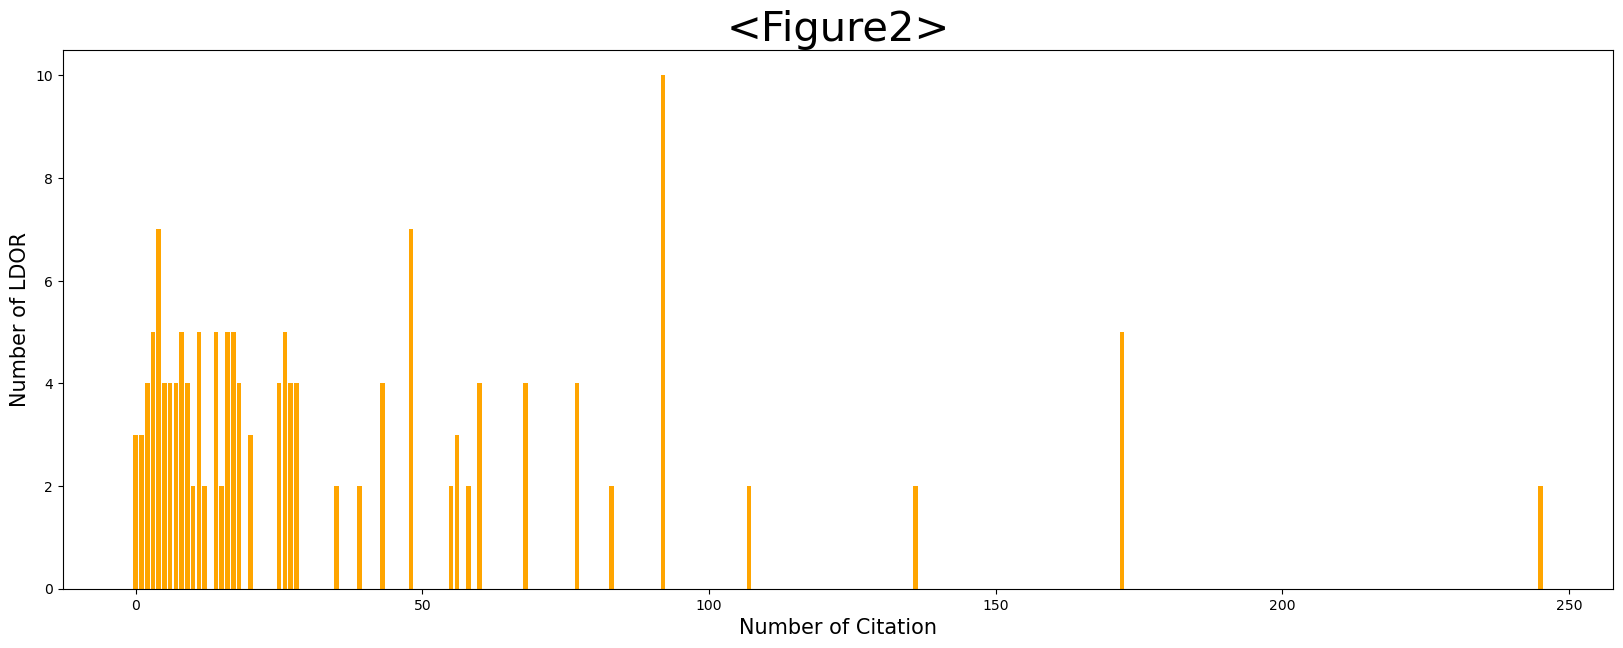

In [19]:
fig2_x = df_merge['Cite_nums']
fig2_y = df_merge['LDOR_nums']

plt.figure(figsize=(20,7))
plt.bar(fig2_x, fig2_y, color="orange")
plt.title('<Figure2>', fontsize=30)
plt.xlabel('Number of Citation', fontsize=15)
plt.ylabel('Number of LDOR', fontsize=15)
plt.show

Unlike question1, this time I also needed to obtain the URLs of each publication. I got the topic URLs in a manner similar to question 1, and then made a database with titles and topics to combine with the previous one. Afterward, I obtained the URLs for each journal paper and made an effort to get the information for each paper. But I struggled to get the number for LDOR. First, I found the string for the LDOR and then used it the first word to count the number of list elements. Finding the string related to YouTube was a challenge, so I found the YouTube links individually and added the number to the LDOR number. After getting all the information, I converted it into a dataframe and then merged it with the topics list that I found earlier. Then I could get the dataframe with the mean and variance values using the functions in Python. For figure1, I converted the dataframe into a separate topic and added years. Using the Seaborn function, I made the dataframe visible and included titles, labels, and legends.  For figure2, I used the original dataframe that I made before and added annotations in the same way.   
The salient point in the figure 1 are Depth and 3D Estimation topics in 2013 has the highest mean of citations and Movement Evaluation in 2017 has the highest variance of citations. In figure2, the number of citation which is close to 100 has the highest number of LDOR. At this point, I realized that a visualized graph is more visible than a dataframe if I want to find the highest or lowest scores. But if there are many features, it seems that it is necessary to sort specific features that we want to look at.

3. The Cross-Sectional Asset Pricing dataset includes 210 features. The target variable is 'excessret', a firm's excess return between the current and the previous quarter. You are required to work on a subset that includes the 'defined features' and the 'target variable' by performing preprocessing (in the subset, there will be 11 features in total including target variable). You are required to extract the 'defined features' that are as indicated below:

defined_columns = ['high52', 'mom12m', 'mom6m', 'maxret', 'mom12moffseason', 'realizedvol', 'idiovolaht', 'zerotrade', 'indretbig', 'returnskew']    
   
Design and implement the solution to analyze the complex relationship between defined features and the firm's excess return between the current and the previous quarter. Highlight and visualise the attributes with the highest probabilistic relationship with the target variable. Justify the design choice and showcase the findings using an appropriate visualisation tool.   

In [20]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [21]:
dataset = pd.read_csv("/Users/seungji/Library/Mobile Documents/com~apple~CloudDocs/DU/Term2/PDS/Assignment/finance_dataset.csv", sep=',', header=0)
dataset.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 214 columns):
 #    Column                     Non-Null Count  Dtype  
---   ------                     --------------  -----  
 0    permno                     500 non-null    float64
 1    yyyymm                     500 non-null    int64  
 2    am                         500 non-null    float64
 3    aop                        500 non-null    float64
 4    abnormalaccruals           500 non-null    float64
 5    accruals                   500 non-null    float64
 6    accrualsbm                 500 non-null    float64
 7    activism1                  500 non-null    float64
 8    activism2                  500 non-null    float64
 9    adexp                      500 non-null    float64
 10   ageipo                     500 non-null    float64
 11   analystrevision            500 non-null    float64
 12   analystvalue               500 non-null    float64
 13   announcementreturn         500 no

In [22]:
dataset_new = dataset[['high52', 'mom12m', 'mom6m', 'maxret', 'mom12moffseason', 'realizedvol', 'idiovolaht', 'zerotrade', 'indretbig', 'returnskew', 'excessret']]

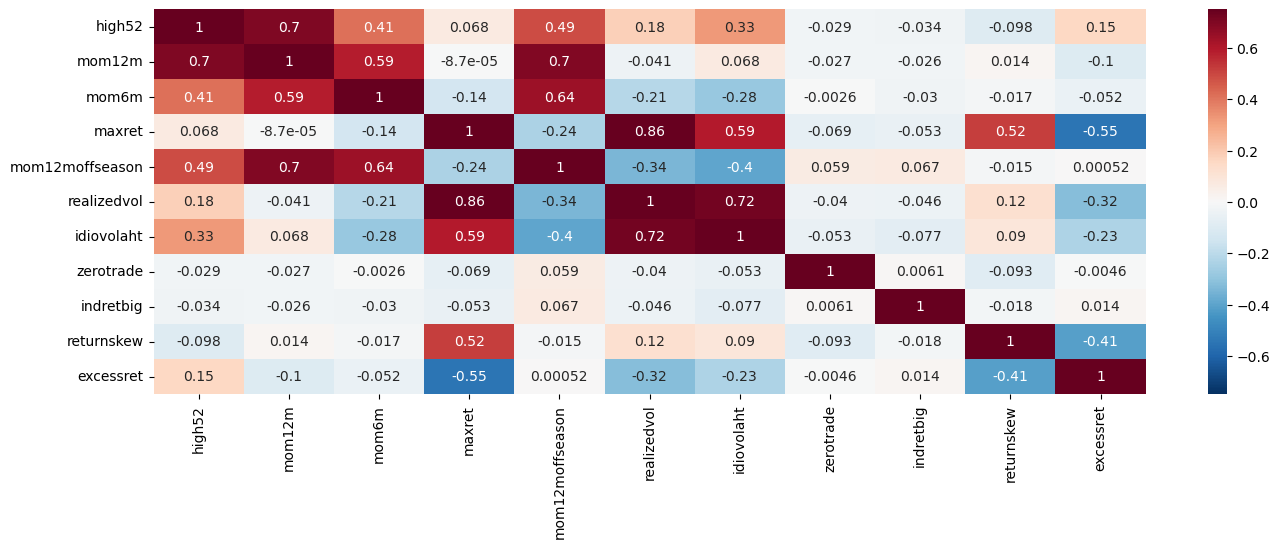

In [23]:
correlation = dataset_new.corr()
plt.figure(figsize=(16, 5))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-0.75, vmax=0.75, cmap="RdBu_r")

In [24]:
X = dataset_new.iloc[:, :-1]
y = dataset_new.iloc[:, -1]
rf = RandomForestRegressor()
rf.fit(X,y)

RandomForestRegressor()

maxret             0.352821
high52             0.164008
realizedvol        0.097204
mom12m             0.095891
returnskew         0.085864
mom6m              0.077703
mom12moffseason    0.056542
idiovolaht         0.041139
indretbig          0.027713
zerotrade          0.001116
dtype: float64


<Axes: title={'center': 'Top 10 features'}>

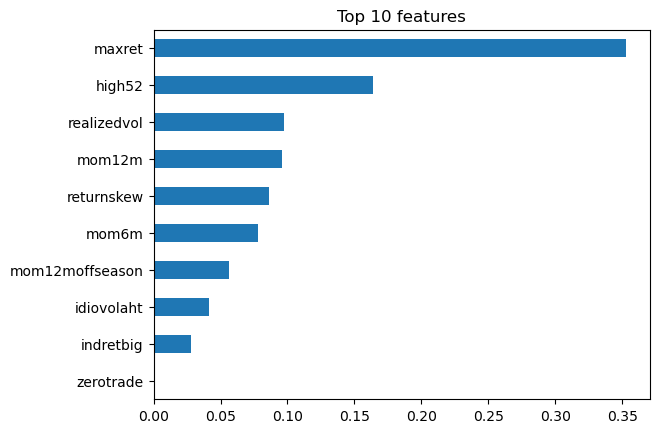

In [25]:
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importance)

%matplotlib inline
n=10
plt.title(f'Top {n} features')
feature_importance.sort_values().plot.barh()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'MSE (Mean squared error): {mean_squared_error(y_test, y_pred)}')

MSE (Mean squared error): 0.006704568497804923


After loading the dataset, I verified that there are 214 columns altogether and every one of them has 500 rows. Since there were no null values in any of the data, I did not replace any missing values. I only retained the columns that were designated and added them to the new dataset. Before evaluating the significance of the feature, I generated a correlation heat map to quickly visualize correlation using the Seaborn function in Python. Through a heat map, it was discovered that 'maxret', 'realizedvol', and 'returnskew' have a negative correlation with the target variable 'excessret'. To determine which feature is the most important among the 10 features, I used the random forest regression method. In Python, we can access it conveniently by using RandomForestRegressor(). A meta estimator known as a random forest combines several decision tree regressors with different sub-samples from the dataset. And averaging is utilized to enhance predictive accuracy and prevent over-fitting. It can be used for both classification and regression. The reason I chose this method is its high prediction and the possibility of ranking the variables. Then I used the feature importance function (feature_importances_), and it turned out that 'maxret' is the most important feature. In the end, I constructed a model using the same random forest regressor and divided the data into the train and test sets with an 8:2 ratio. Using the mean_squared_error function, I was able to find a mean squared error figure that showed low consequences.
